In [1]:
from sympy import symbols, sinh, cosh, tanh, Symbol, simplify
from IPython.display import display, Math

# Define your symbols
n, p, q, alpha_prime = symbols('n p q alpha_prime')
lamb = symbols('lamb')  # Original symbol for lambda

# Define the expressions using the original symbol
num = 1 + (
    (sinh(((n + 1) / 2 - q) * lamb) - sinh(((n + 1) / 2 - p) * lamb)) 
    / (sinh(((n + 1) / 2) * lamb) - sinh(((n - 1) / 2) * lamb))
)

#correct denominator
denom = ( 1 - 2*alpha_prime 
- (4 * alpha_prime * ( (tanh(lamb / 2)) / sinh(lamb * n) ) * sinh( ((q-p)/2) * lamb) ) 
* (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )
)

c_analytical = num/denom

# New symbol for lambda (λ)
lambda_symbol = Symbol('lambda', real=True)

# Substitute lamb with the new lambda symbol
num_display = num.subs(lamb, lambda_symbol)
denom_display = denom.subs(lamb, lambda_symbol)
c_analytical_display = c_analytical.subs(lamb, lambda_symbol)

print('display:')
print('num:')
display(num_display)
print('denom')
display(denom_display)
print('c_analytical_start')
display(c_analytical_display)


display:
num:


1 + (-sinh(lambda*(n/2 - p + 1/2)) + sinh(lambda*(n/2 - q + 1/2)))/(-sinh(lambda*(n/2 - 1/2)) + sinh(lambda*(n/2 + 1/2)))

denom


-4*alpha_prime*(sinh(lambda*(p/2 + q/2 - 0.5))*cosh(lambda*(n - p + 0.5)) + sinh(lambda*(n - p/2 - q/2 + 0.5))*cosh(lambda*(q - 0.5)))*sinh(lambda*(-p/2 + q/2))*tanh(lambda/2)/sinh(lambda*n) - 2*alpha_prime + 1

c_analytical_start


(1 + (-sinh(lambda*(n/2 - p + 1/2)) + sinh(lambda*(n/2 - q + 1/2)))/(-sinh(lambda*(n/2 - 1/2)) + sinh(lambda*(n/2 + 1/2))))/(-4*alpha_prime*(sinh(lambda*(p/2 + q/2 - 0.5))*cosh(lambda*(n - p + 0.5)) + sinh(lambda*(n - p/2 - q/2 + 0.5))*cosh(lambda*(q - 0.5)))*sinh(lambda*(-p/2 + q/2))*tanh(lambda/2)/sinh(lambda*n) - 2*alpha_prime + 1)

# This is just testing c!

In [2]:
denom_part = (2 * sinh(lamb/2) * cosh(lamb/2 * n))
denom_2 = denom * denom_part

In [3]:
display(denom_2)

2*(-4*alpha_prime*(sinh(lamb*(p/2 + q/2 - 0.5))*cosh(lamb*(n - p + 0.5)) + sinh(lamb*(n - p/2 - q/2 + 0.5))*cosh(lamb*(q - 0.5)))*sinh(lamb*(-p/2 + q/2))*tanh(lamb/2)/sinh(lamb*n) - 2*alpha_prime + 1)*sinh(lamb/2)*cosh(lamb*n/2)

In [4]:
import numpy as np

alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )
D_sim = (
        (cosh((q - 1 / 2) * lamb) * sinh((n - ((p + q) / 2 - 1 / 2)) * lamb)) +
        (cosh((n - p + 1 / 2) * lamb) * sinh(((p + q) / 2 - 1 / 2) * lamb))
    )

D_sim = sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2

c = num/denom

#checking term 1

term1 = denom_part * (
    1 - 2 * alpha_prime - 
    (4 * alpha_prime * (tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim))
)
denom_2 = denom * denom_part
print(term1.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))


denom_2_check = denom_2 / denom_part
print(denom_2_check.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(denom.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

c_denom_2 = (num * denom_part) / denom_2
print(c_denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(c.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

print('term1 is correct')
print('check with c and normal denom')

1.77375328568449
1.77375328568449
0.446906661018919
0.446906661018919
3.70778069546815
3.70778069546815
term1 is correct
check with c and normal denom


In [5]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3
term3 = 2 * cosh(n/2 * lamb) * sinh(lamb/2) * (
    (cosh(lamb)/cosh(lamb) - 2 * ( 1 / (2 * cosh(lamb)) )
 - 4 * ( 1 / (2 * cosh(lamb)) ) * (tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim))
)
print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term3.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term3)

print('term3 is correct')

1.77375328568449
1.77375328568449


2*(-2*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb*(-p/2 + q/2))*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb)) + 1 - 1/cosh(lamb))*sinh(lamb/2)*cosh(lamb*n/2)

term3 is correct


In [6]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.1
term31 =  (
    (2 * cosh(n/2 * lamb) * sinh(lamb/2) * cosh(lamb)/cosh(lamb) - 2 * 2 * cosh(n/2 * lamb) * sinh(lamb/2) * ( 1 / (2 * cosh(lamb)) )
 - 4 * 2 * cosh(n/2 * lamb) * sinh(lamb/2) * ( 1 / (2 * cosh(lamb)) ) * (tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim))
)
print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term31.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term31)

print('term3.1 is correct')

1.77375328568449
1.77375328568449


-4*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb/2)*sinh(lamb*(-p/2 + q/2))*cosh(lamb*n/2)*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb)) + 2*sinh(lamb/2)*cosh(lamb*n/2) - 2*sinh(lamb/2)*cosh(lamb*n/2)/cosh(lamb)

term3.1 is correct


In [7]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.2
term32 =  (
    2 * cosh(n/2 * lamb) * sinh(lamb/2) * cosh(lamb) / cosh(lamb) 
    - 2 * cosh(n/2 * lamb) * sinh(lamb/2) / cosh(lamb)  
 - ( 2 * 2 * cosh(n/2 * lamb) * sinh(lamb/2) / cosh(lamb) ) * (tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb)  * D_sim)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term32.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term32)

print('term3.2 is correct')

1.77375328568449
1.77375328568449


-4*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb/2)*sinh(lamb*(-p/2 + q/2))*cosh(lamb*n/2)*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb)) + 2*sinh(lamb/2)*cosh(lamb*n/2) - 2*sinh(lamb/2)*cosh(lamb*n/2)/cosh(lamb)

term3.2 is correct


In [8]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.3
term33 =  (
    2 * cosh(n/2 * lamb) * sinh(lamb/2) * ( cosh(lamb) - 1 ) / cosh(lamb)   
 - ( 2 * 2 * cosh(n/2 * lamb) * sinh(lamb/2) / cosh(lamb) ) * (tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term33.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term33)

print('term3.3 is correct')

1.77375328568449
1.77375328568449


2*(cosh(lamb) - 1)*sinh(lamb/2)*cosh(lamb*n/2)/cosh(lamb) - 4*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb/2)*sinh(lamb*(-p/2 + q/2))*cosh(lamb*n/2)*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb))

term3.3 is correct


In [9]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.4
term34 =  (
    (2 * tanh(lamb/2)) * 
( 
        
     cosh(n/2 * lamb) * sinh(lamb/2) * sinh(lamb) / cosh(lamb)   
 - ( 2 * cosh(n/2 * lamb) * sinh(lamb/2) / cosh(lamb) ) * (1 / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim)
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term34.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term34)

print('term3.4 is correct')

1.77375328568449
1.77375328568449


2*(-2*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb/2)*sinh(lamb*(-p/2 + q/2))*cosh(lamb*n/2)/(sinh(lamb*n)*cosh(lamb)) + sinh(lamb/2)*sinh(lamb)*cosh(lamb*n/2)/cosh(lamb))*tanh(lamb/2)

term3.4 is correct


In [10]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.5
term35 =  (
    (2 * tanh(lamb/2)) * 
( 
     ( sinh(lamb) * cosh(n/2 * lamb) * sinh(lamb/2)  * sinh(lamb * n) -  2 * cosh(n/2 * lamb) * sinh(lamb/2) * sinh( ((q-p)/2) * lamb) * D_sim)
     / ( cosh(lamb) * sinh(lamb * n) )
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term35.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term35)

print('term3.5 is correct')

1.77375328568449
1.77375328568449


2*(-2*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb/2)*sinh(lamb*(-p/2 + q/2))*cosh(lamb*n/2) + sinh(lamb/2)*sinh(lamb)*sinh(lamb*n)*cosh(lamb*n/2))*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb))

term3.5 is correct


In [11]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.6
term36 =  (
    (2 * tanh(lamb/2)) * ( cosh(n/2 * lamb) * sinh(lamb/2) ) * 
( 
     ( sinh(lamb) * sinh(lamb * n) -  2  * sinh( ((q-p)/2) * lamb) * D_sim)
     / ( cosh(lamb) * sinh(lamb * n) )
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term36.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

display(term36)

print('term3.6 is correct')

1.77375328568449
1.77375328568449


2*(-2*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb*(-p/2 + q/2)) + sinh(lamb)*sinh(lamb*n))*sinh(lamb/2)*cosh(lamb*n/2)*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb))

term3.6 is correct


In [12]:
print((tanh(lamb)).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print((sinh(lamb)/cosh(lamb)).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

0.597982000498941
0.597982000498941


In [13]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.7

term36 =  (
    (2 * tanh(lamb/2)) * ( cosh(n/2 * lamb) * sinh(lamb/2) ) * 
( 
     ( sinh(lamb) * sinh(lamb * n) -  2  * sinh( ((q-p)/2) * lamb) * D_sim)
     / ( cosh(lamb) * sinh(lamb * n) )
)
 )


term37 =  (
    (2 * tanh(lamb/2)) * ( cosh(n/2 * lamb) * sinh(lamb/2) ) * 
( 
     tanh(lamb)
     -  (2  * sinh( ((q-p)/2) * lamb) * D_sim) / ( cosh(lamb) * sinh(lamb * n) )
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term37.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

print('term3.7 is correct')

1.77375328568449
1.77375328568449
term3.7 is correct


In [14]:
alpha_sub = 1 - 2 * alpha_prime_sub

term3 = 2 * cosh(n/2 * lamb) * sinh(lamb/2) * (
    alpha_sub
 - ( 2 / (cosh(lamb)) * tanh(lamb/2) / sinh(lamb * n) * sinh( ((q-p)/2) * lamb) * D_sim)
)

denom_2_check = ( 2 * ( cosh(n/2 * lamb) * sinh(lamb/2) )
                    * ( alpha_sub - 2 * tanh(lamb/2) * sinh((q-p)/2 * lamb) * D_sim 
                                    / (cosh(lamb) * sinh(lamb * n))
                    )
)

print(term3.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(denom_2_check.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

print((alpha_sub).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

1.77375328568449
1.77375328568449
0.198490469751429


In [15]:
# checking identity
print( (tanh(lamb/2) * tanh(lamb)).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }) )
print(alpha_sub.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))


0.198490469751429
0.198490469751429


In [16]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.7

term38 =  (
    (2 * cosh(n/2 * lamb) * sinh(lamb/2) ) * 
( 
     alpha_sub
     -  (2 * tanh(lamb/2) * sinh( ((q-p)/2) * lamb) * D_sim) / ( cosh(lamb) * sinh(lamb * n) )
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term38.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

print('term3.8 is correct')

1.77375328568449
1.77375328568449
term3.8 is correct


In [17]:
# alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )

#checking term 3.9

term39 =  (
    (2 * cosh(n/2 * lamb) * sinh(lamb/2) ) * 
( 
     alpha_sub
     -  (2 * tanh(lamb/2) * sinh( ((q-p)/2) * lamb) * D_sim) / ( cosh(lamb) * sinh(lamb * n) )
)
 )

 #checking term 3.10
denom_2_final=  (
    (sinh( (n+1) / 2 * lamb) - sinh( (n-1) / 2 * lamb)) * tanh(lamb/2)
    * (alpha_sub 
        - (2 * tanh(lamb/2) / (cosh(lamb) * sinh(lamb * n)) ) * sinh( ((q-p)/2) * lamb) * D_sim )
)

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(term39.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

print('term3.9 is correct')

1.77375328568449
1.77375328568449
term3.9 is correct


In [18]:
c_denom_2 = (num * denom_part) / denom_2
print(c_denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(c.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print('formula is correct!')

3.70778069546815
3.70778069546815
formula is correct!


In [19]:
#verifying transformation
print((2 * ( cosh(n/2 * lamb) * sinh(lamb/2) * tanh(lamb/2)) ).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }) )
print(((sinh( (n+1) / 2 * lamb) - sinh( (n-1) / 2 * lamb)) * tanh(lamb/2)).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

1.31743116546896
1.31743116546896


In [20]:
# #verifying transformation (breaks code below so just verify and then comment out if you need to see this)
# print(lamb)
# lamb = 0.69
# print(lamb)
# print(alpha_prime)
# alpha_prime = (1/(2 *cosh(lamb))).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) })
# print(alpha_prime)
# print((1-2*alpha_prime).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
# print((tanh(lamb/2) * tanh(lamb)).evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }) )

# lamb = symbols('lamb')
# alpha_prime = symbols('alpha_prime')

In [21]:
display(denom_2)

2*(-4*alpha_prime*(sinh(lamb*(p/2 + q/2 - 0.5))*cosh(lamb*(n - p + 0.5)) + sinh(lamb*(n - p/2 - q/2 + 0.5))*cosh(lamb*(q - 0.5)))*sinh(lamb*(-p/2 + q/2))*tanh(lamb/2)/sinh(lamb*n) - 2*alpha_prime + 1)*sinh(lamb/2)*cosh(lamb*n/2)

In [22]:
alpha_prime_sub = ( 1 / (2 * cosh(lamb)) )
alpha_sub = 1 - 2 *alpha_prime_sub

#checking term 3.10
denom_2_final=  (
    (sinh((n+1)/2 * lamb) - sinh((n-1)/2 * lamb)) * 
( 
     alpha_sub
     -  (2 * tanh(lamb/2) * sinh( ((q-p)/2) * lamb) * D_sim) / ( cosh(lamb) * sinh(lamb * n) )
)
 )

print(denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(denom_2_final.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))


display(term36)

print('final denominator is correct')

1.77375328568449
1.77375328568449


2*(-2*(sinh(lamb*(n - p/2 + q/2)) - sinh(lamb*(n - 3*p/2 - q/2 + 1))/2 + sinh(lamb*(n - p/2 - 3*q/2 + 1))/2)*sinh(lamb*(-p/2 + q/2)) + sinh(lamb)*sinh(lamb*n))*sinh(lamb/2)*cosh(lamb*n/2)*tanh(lamb/2)/(sinh(lamb*n)*cosh(lamb))

final denominator is correct


In [23]:
display(num)

1 + (-sinh(lamb*(n/2 - p + 1/2)) + sinh(lamb*(n/2 - q + 1/2)))/(-sinh(lamb*(n/2 - 1/2)) + sinh(lamb*(n/2 + 1/2)))

In [24]:
num_final = ( sinh((n+1)/2 * lamb) - sinh((n-1)/2 * lamb)
                - sinh( (((n+1)/2 - p) * lamb) ) + sinh( (((n+1)/2 - q) * lamb) )
)

num_part = sinh((n+1)/2 * lamb) - sinh((n-1)/2 * lamb)
num_final_check = num * num_part

print(num_final.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(num_final_check.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

6.57668819118416
6.57668819118416


3.70778069546815
3.70778069546815


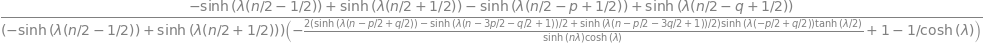

: 

In [25]:
c_denom_2 = num_final / denom_2_final
print(c_denom_2.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))
print(c.evalf(subs = {n: 7, p: 5, q: 2, lamb: 0.69, alpha_prime: 1/(2 *cosh(lamb)) }))

from sympy import init_printing

init_printing(use_unicode=True)
lamb = symbols('lambda')
display(c_denom_2.subs({'lamb': 'λ', 'alpha_sub': 'alpha'}))